In [2]:
from options.opt import Opt
from data import CreateDataset
from torch_geometric.data import DataLoader
from models import CreateModel
from util.retriever import Retriever

In [3]:
opt = Opt() 
retriever = Retriever(opt)
dataset = CreateDataset(opt)
model = CreateModel(opt)

loaded mean / std from cache
loading the model from ./checkpoints\MCB_B_NR_1000\196_net.pth


## Extract features for the database

In [4]:
fea_db = retriever.extract_database_features(model, dataset)

## Test retrieval results of single examples

In [10]:
query_set = dataset
fea_q = fea_db
dist, ranked_list, dissm = retriever.retrieve(model, query_set, dataset, fea_db, fea_q)

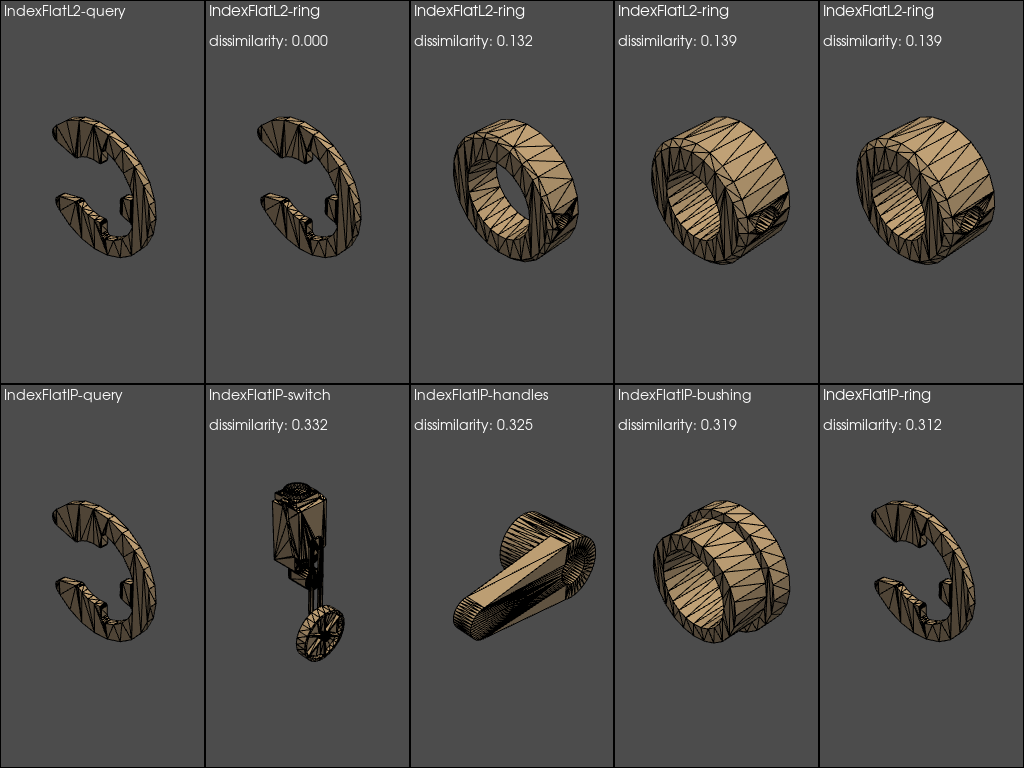

In [11]:
i=0
retriever.show_results(i, ranked_list, dissm)

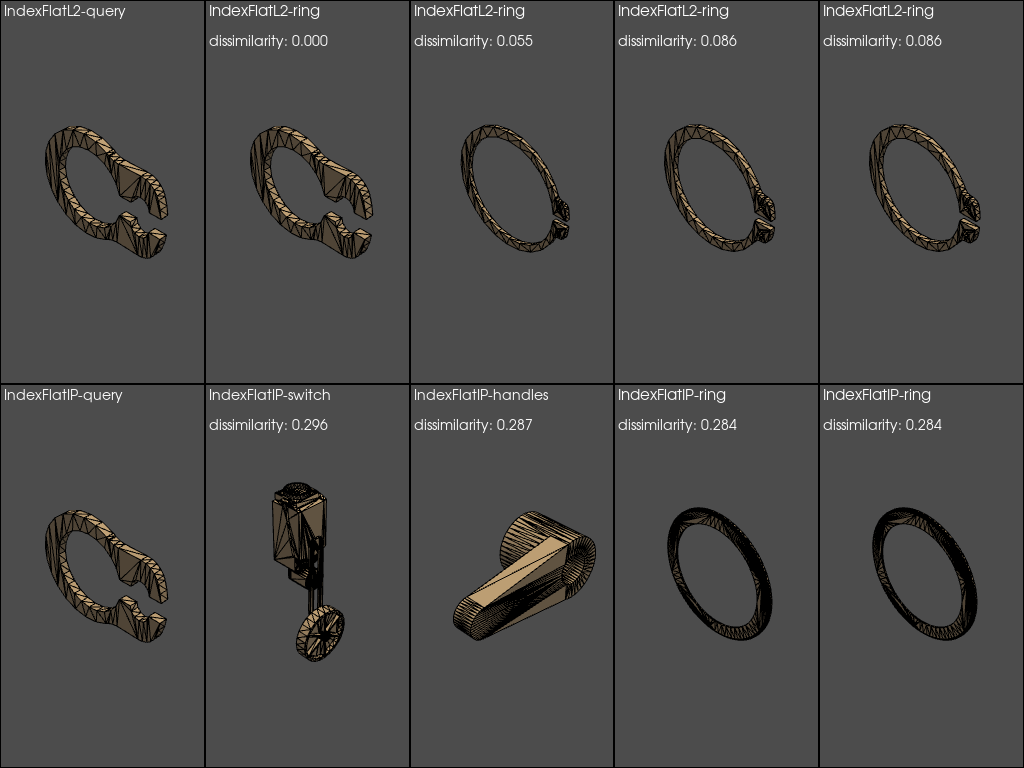

In [12]:
i=10
retriever.show_results(i, ranked_list, dissm)

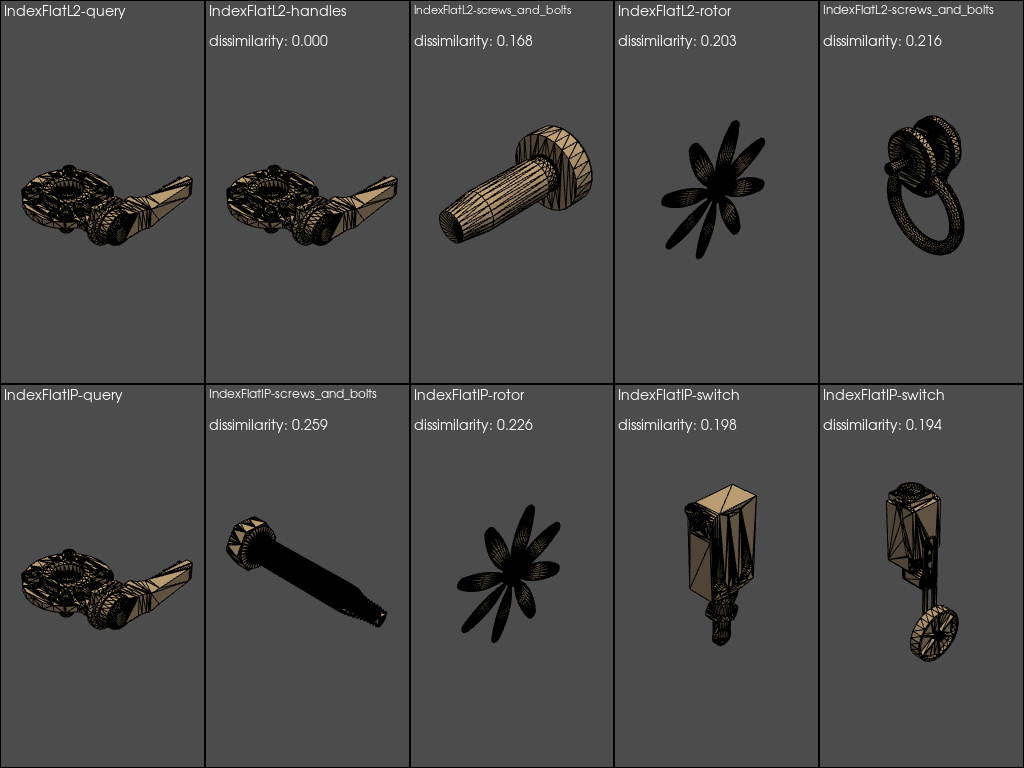

In [13]:
i=20
retriever.show_results(i, ranked_list, dissm)

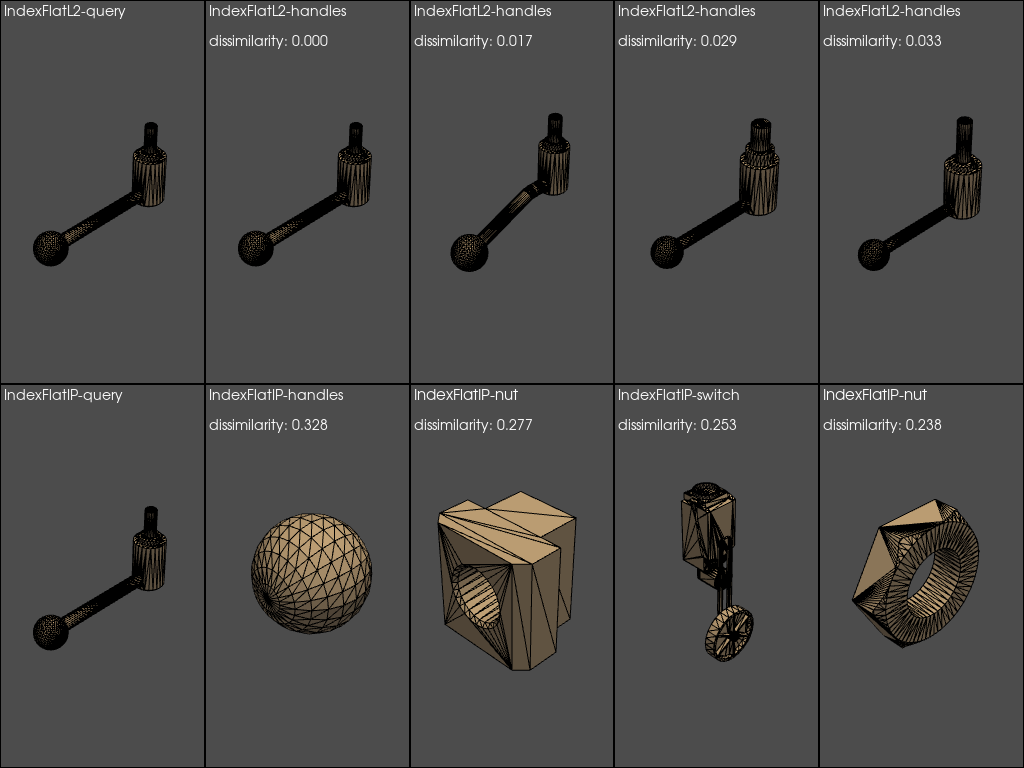

In [14]:
i=30
retriever.show_results(i, ranked_list, dissm)

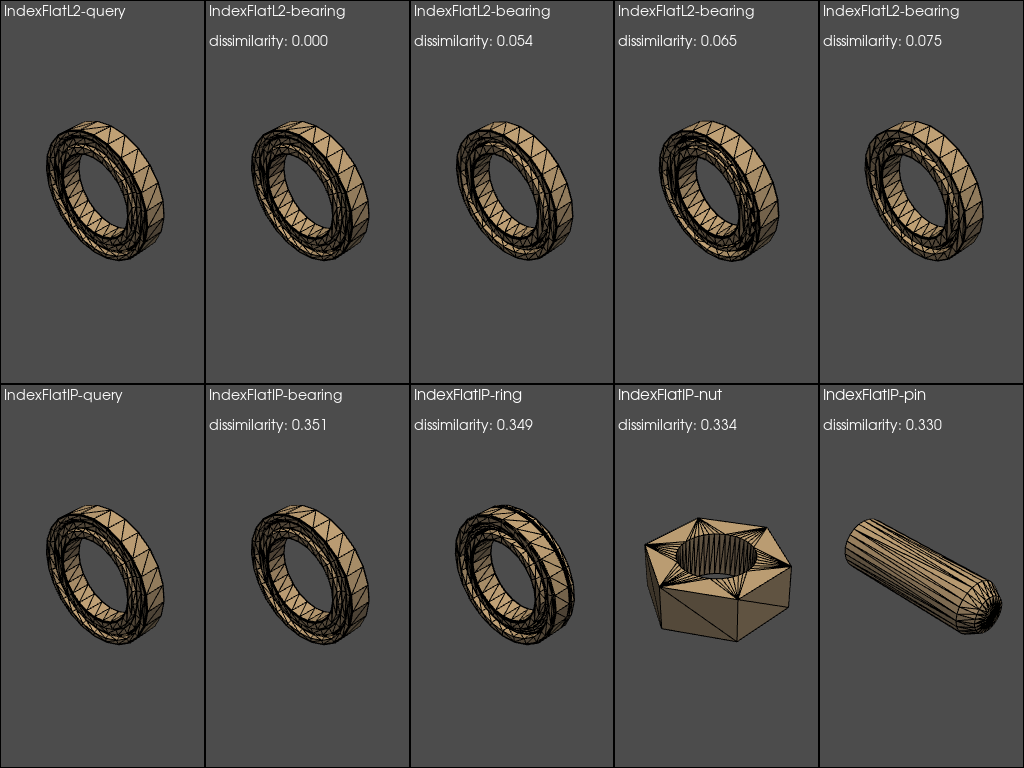

In [15]:
i=40
retriever.show_results(i, ranked_list, dissm)

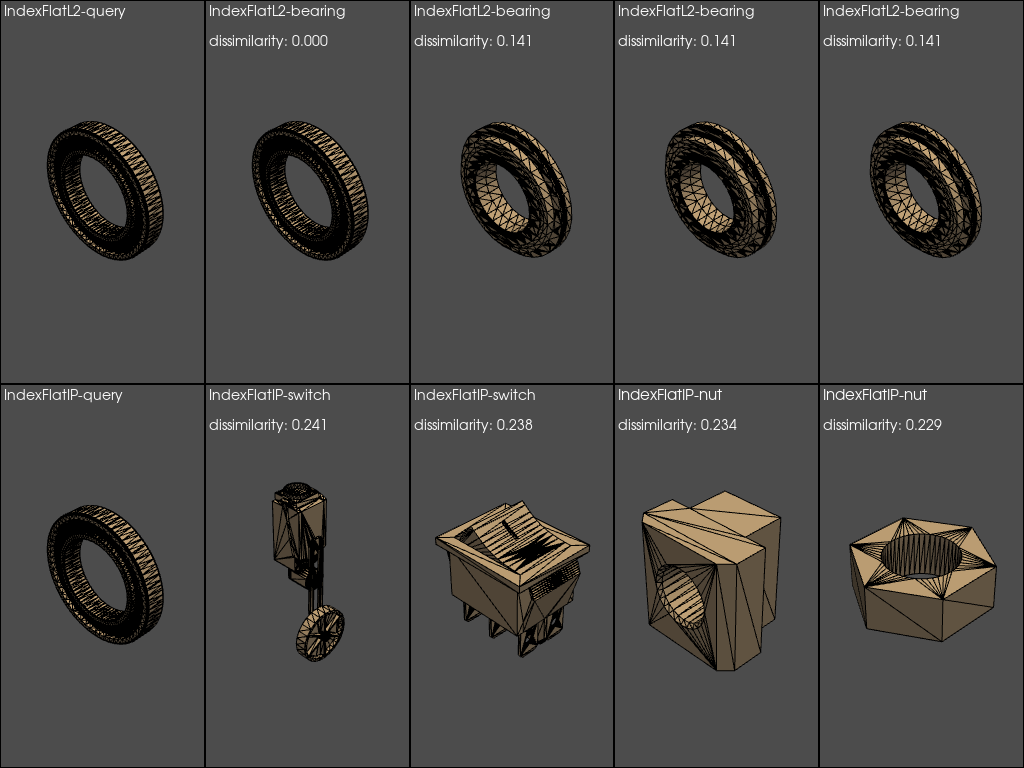

In [16]:
i=50
retriever.show_results(i, ranked_list, dissm)

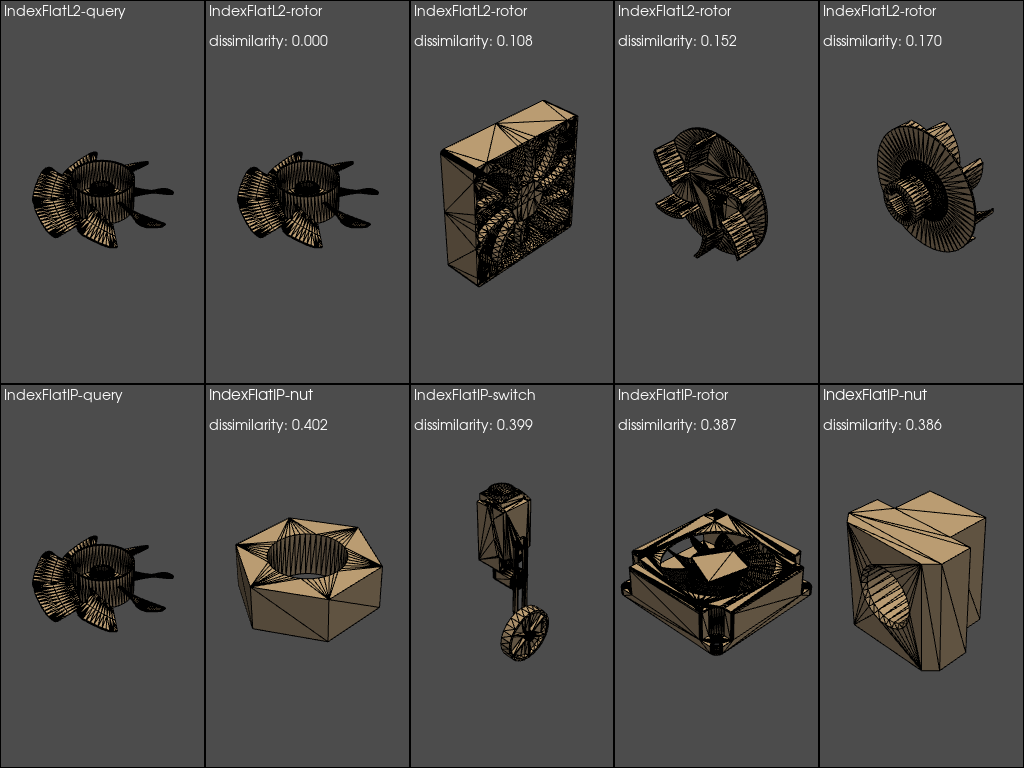

In [17]:
i=60
retriever.show_results(i, ranked_list, dissm)

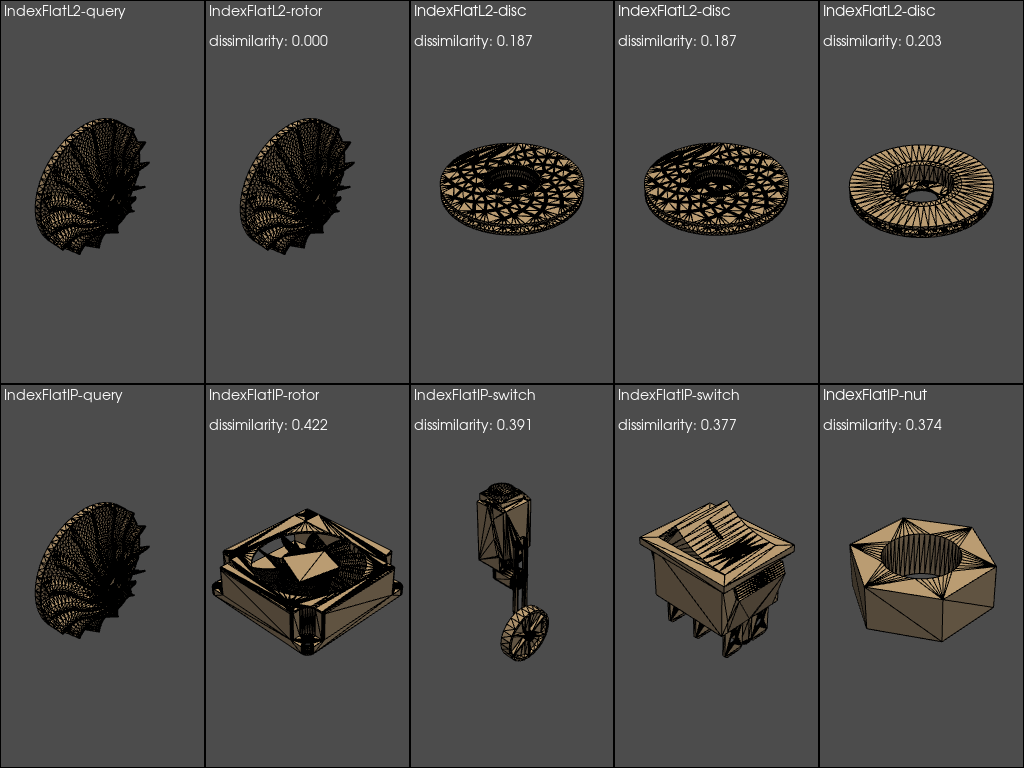

In [18]:
i=70
retriever.show_results(i, ranked_list, dissm)

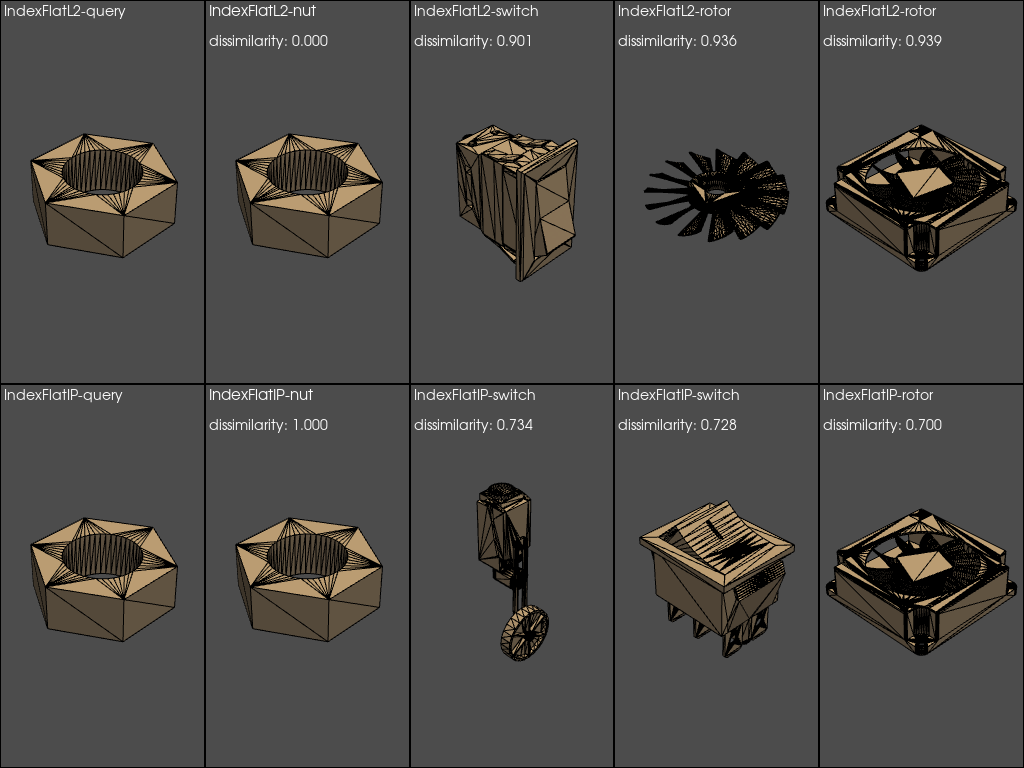

In [19]:
i=80
retriever.show_results(i, ranked_list, dissm)

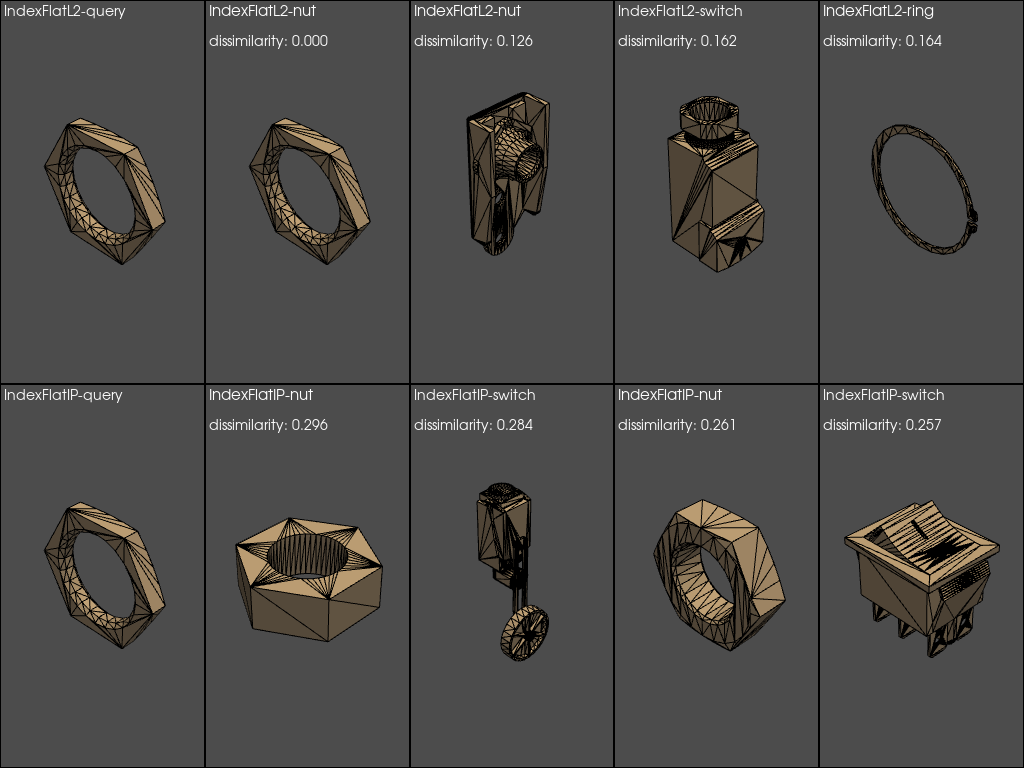

In [20]:
i=90
retriever.show_results(i, ranked_list, dissm)

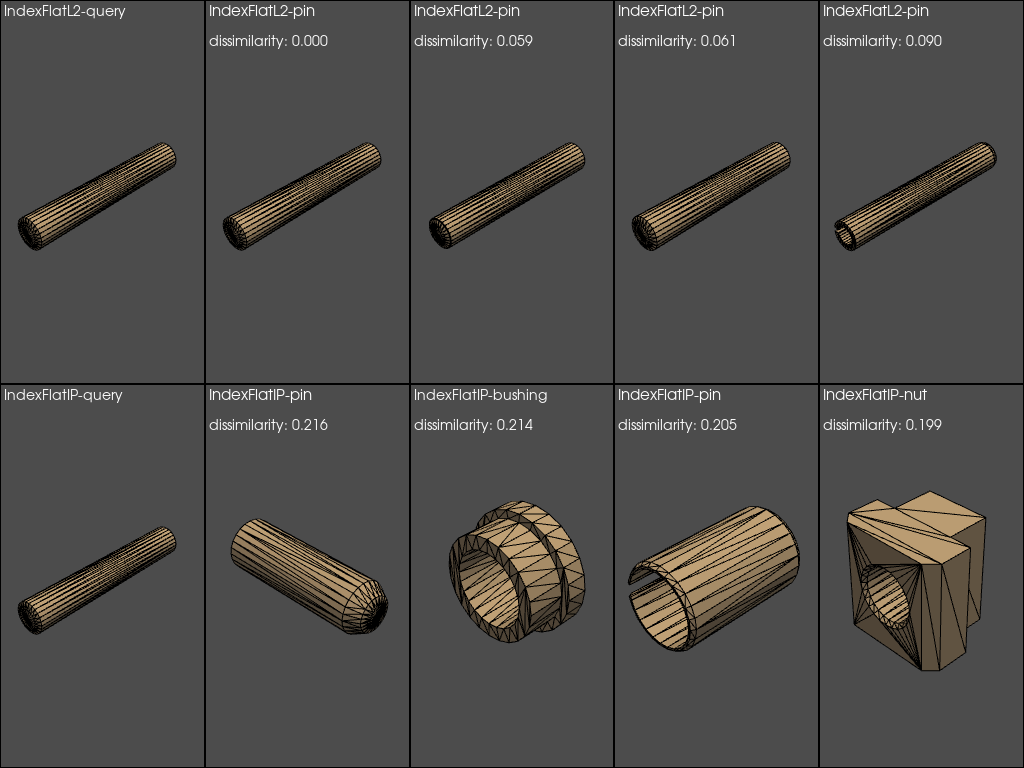

In [21]:
i=100
retriever.show_results(i, ranked_list, dissm)

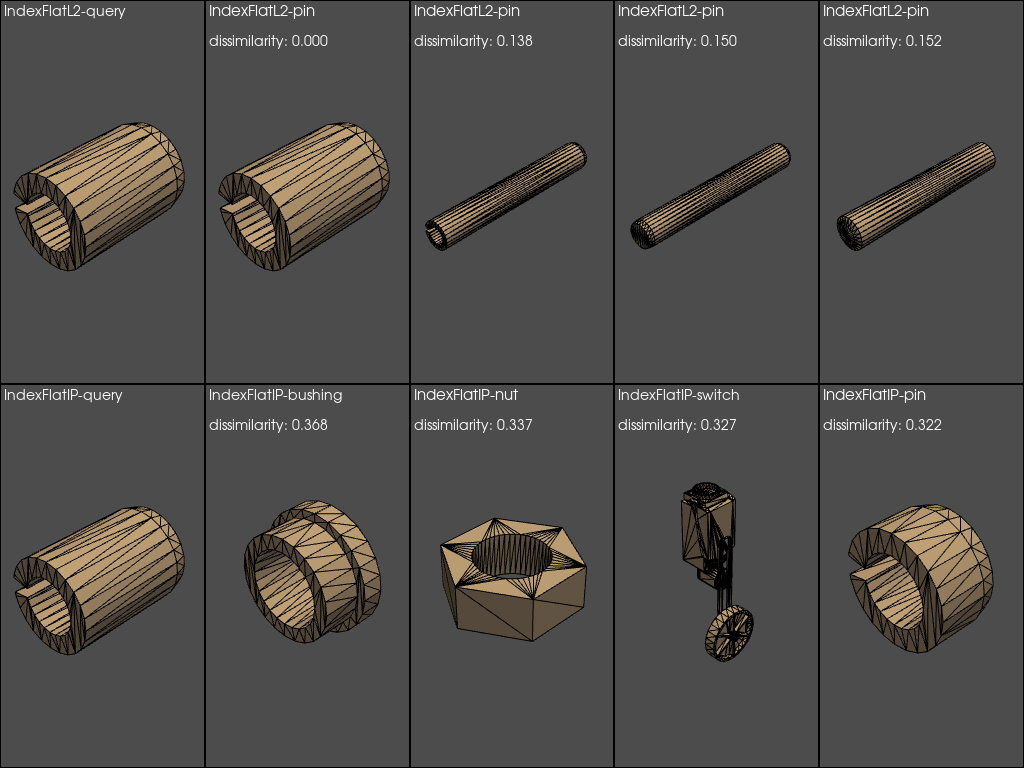

In [22]:
i=110
retriever.show_results(i, ranked_list, dissm)

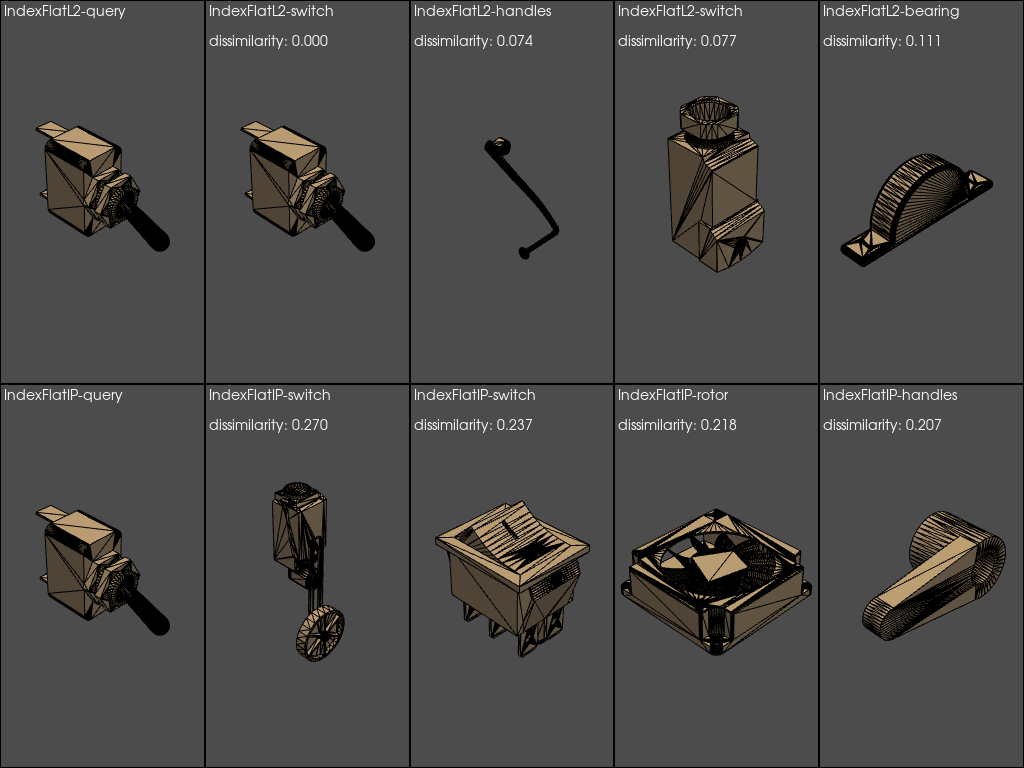

In [23]:
i=120
retriever.show_results(i, ranked_list, dissm)

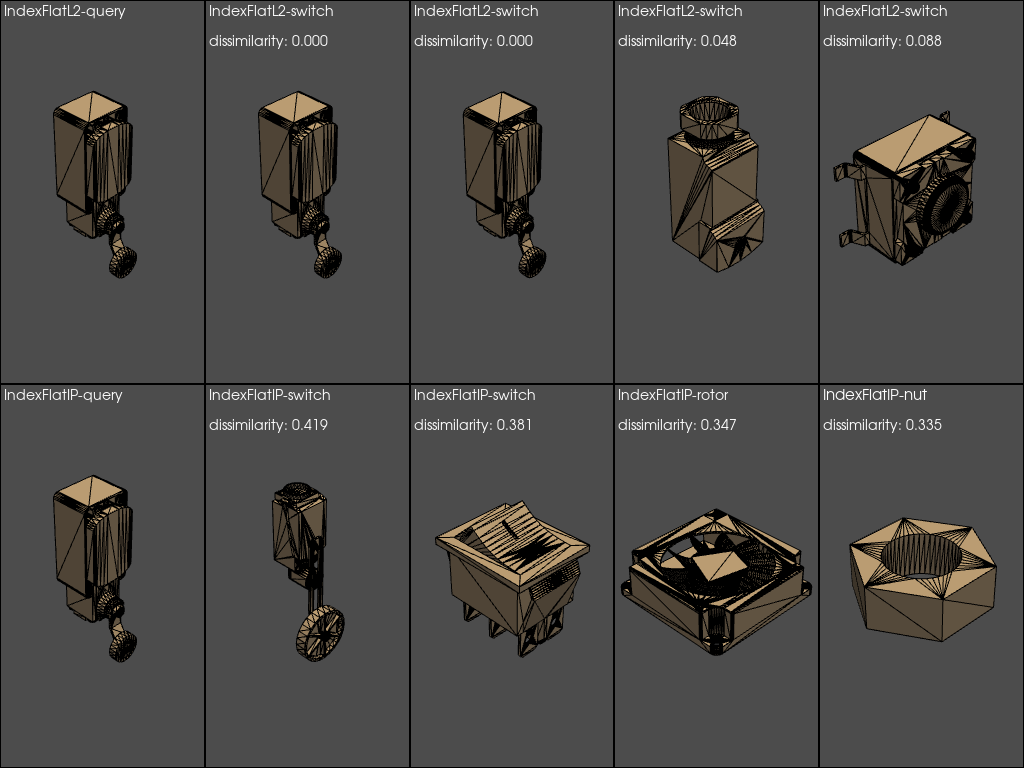

In [24]:
i=130
retriever.show_results(i, ranked_list, dissm)

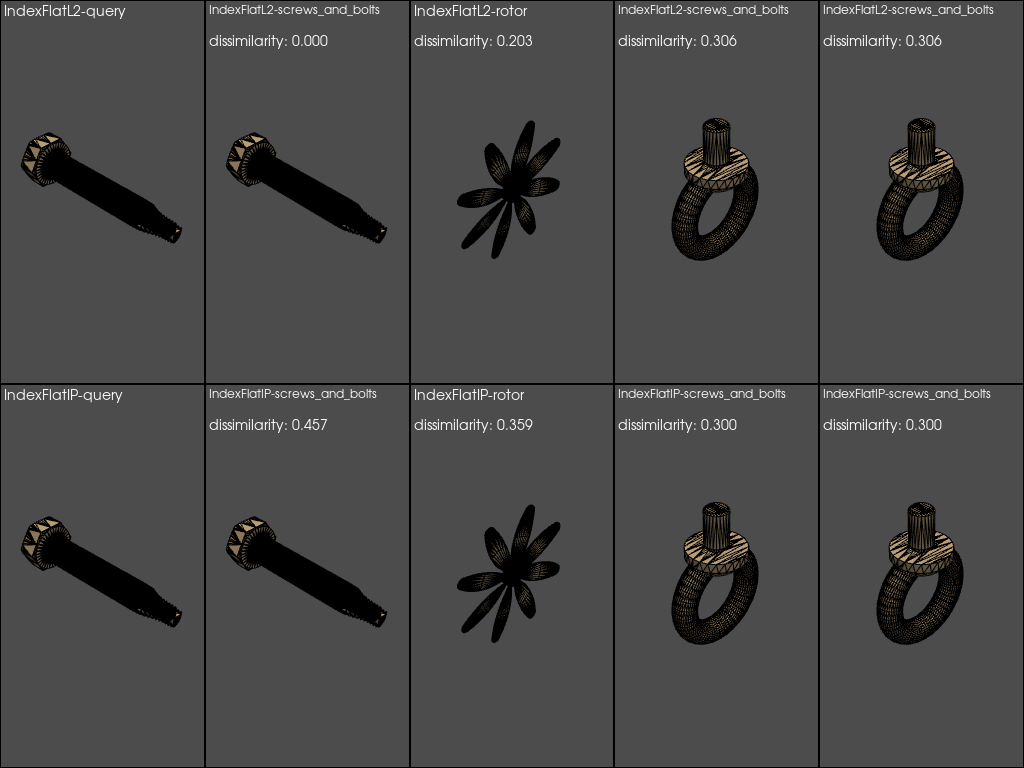

In [25]:
i=140
retriever.show_results(i, ranked_list, dissm)

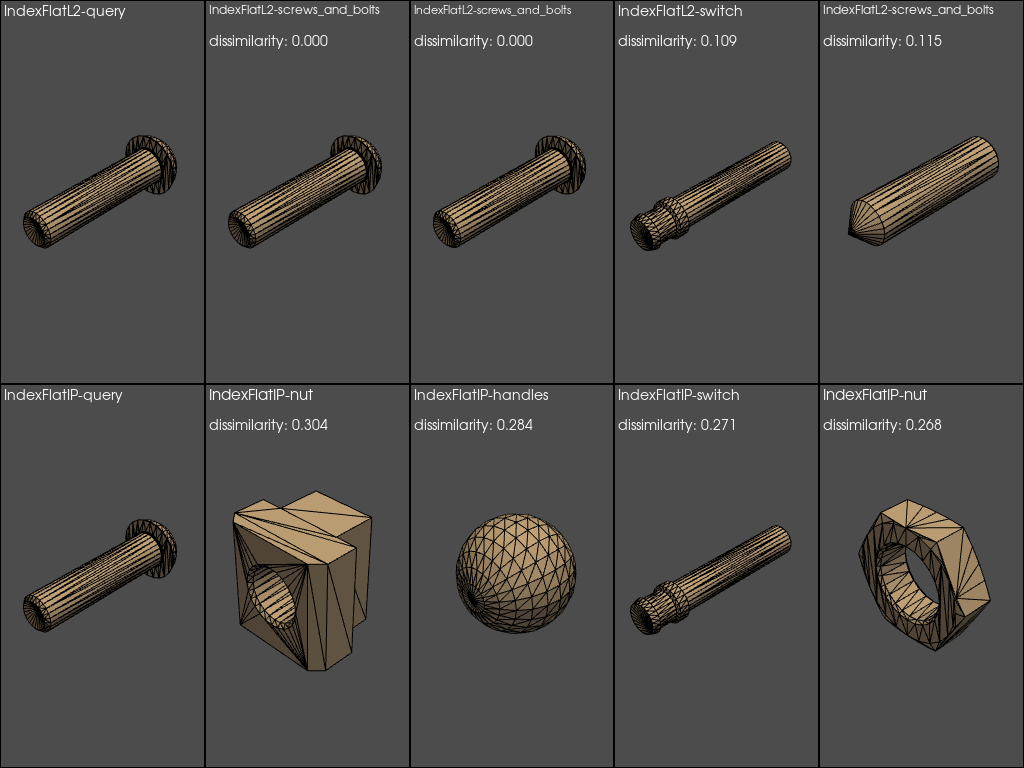

In [26]:
i=150
retriever.show_results(i, ranked_list, dissm)

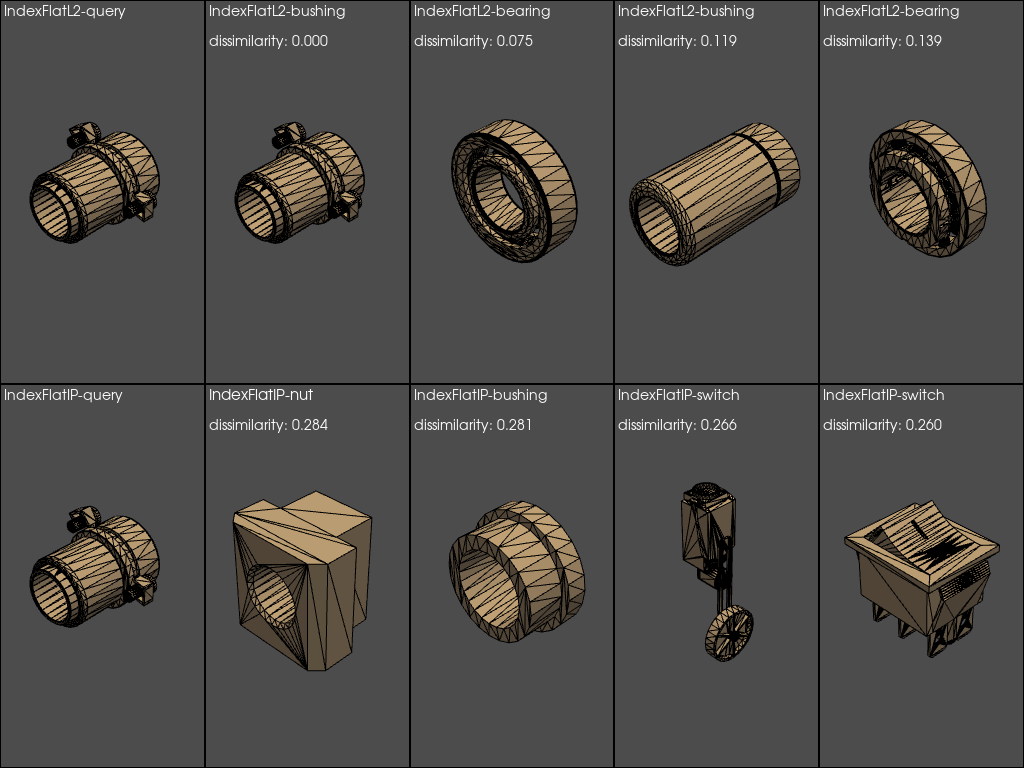

In [27]:
i=160
retriever.show_results(i, ranked_list, dissm)

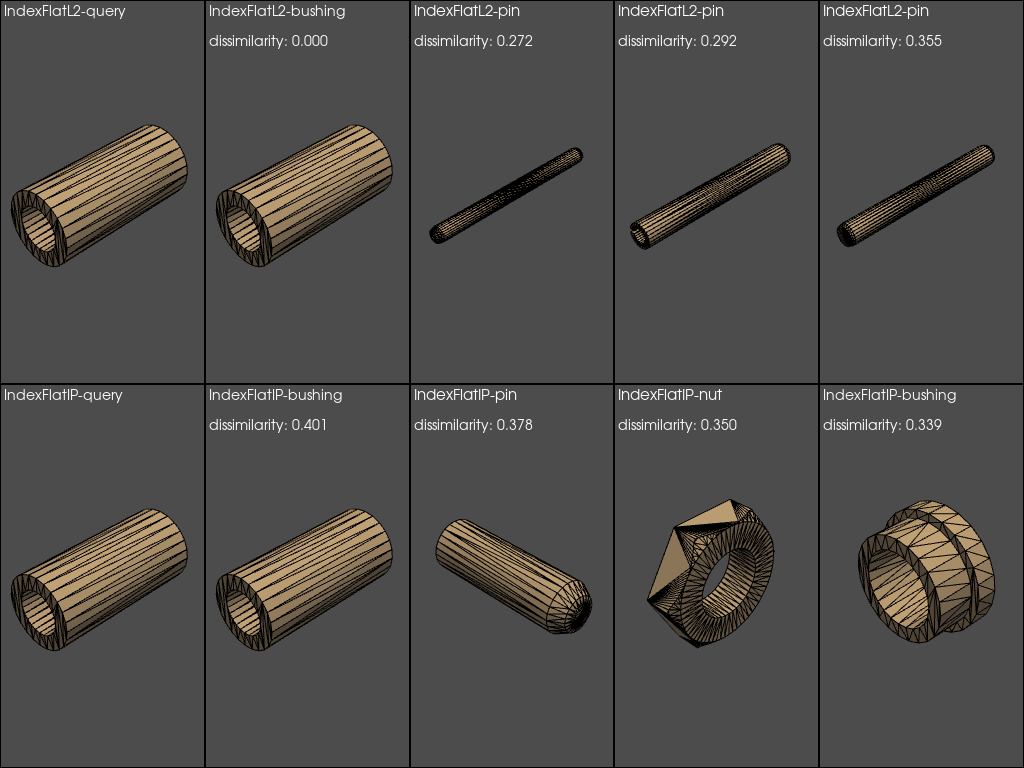

In [28]:
i=170
retriever.show_results(i, ranked_list, dissm)

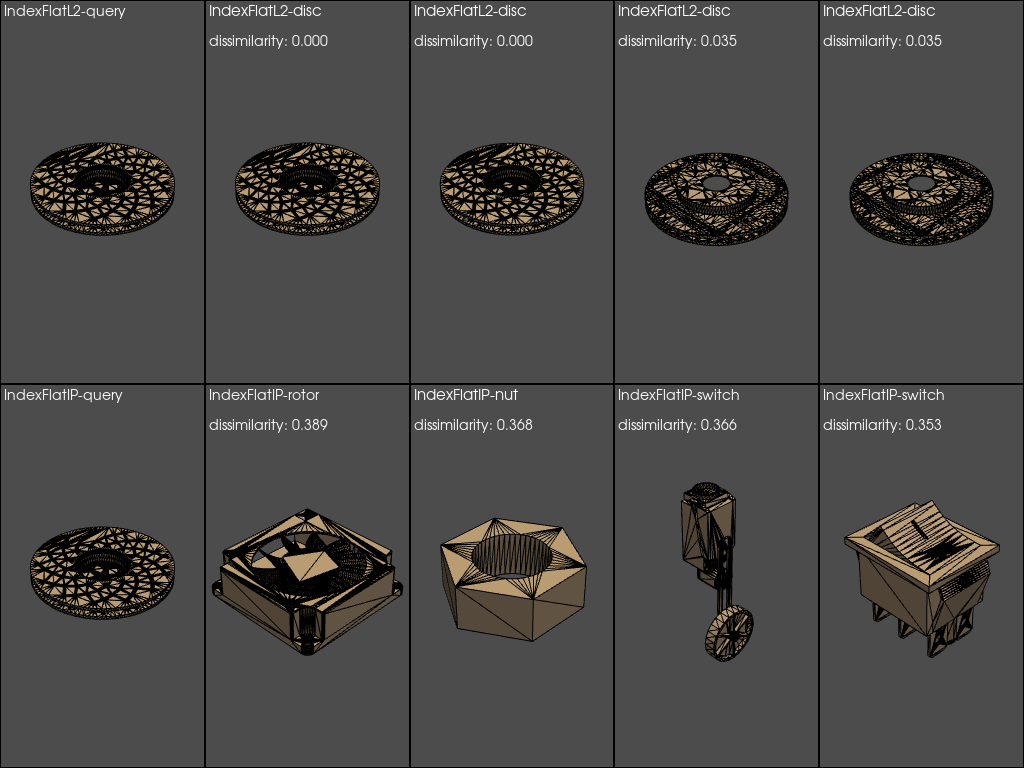

In [29]:
i=180
retriever.show_results(i, ranked_list, dissm)

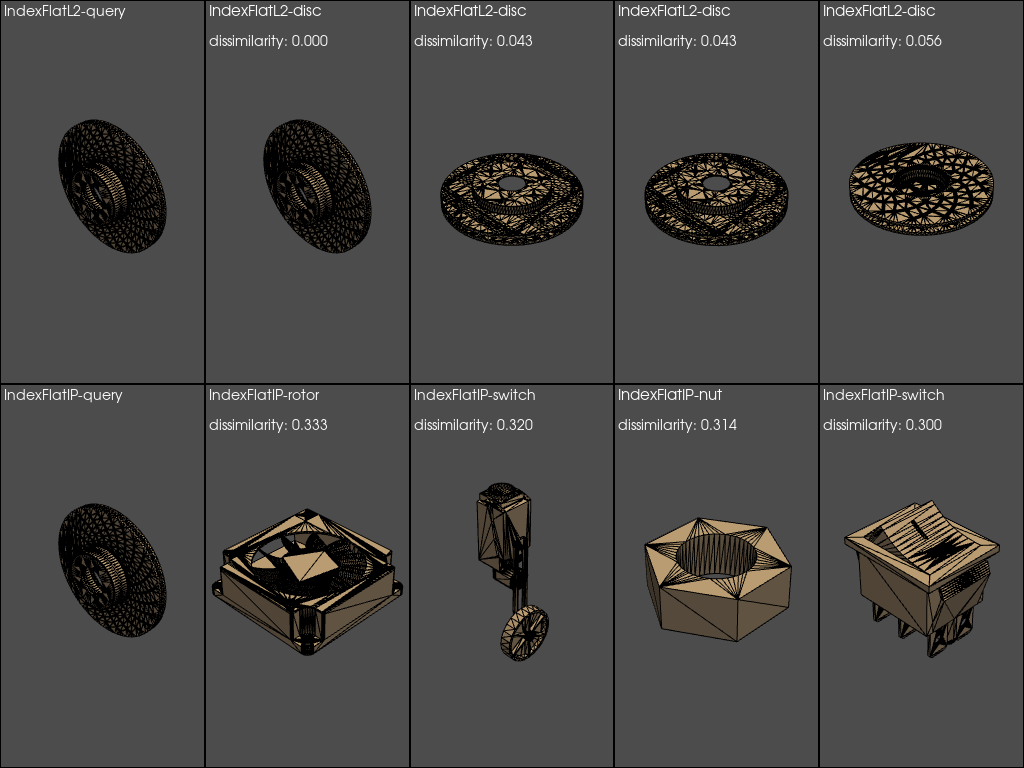

In [30]:
i=190
retriever.show_results(i, ranked_list, dissm)